# PAP2: Versuch 243 Thermisches Rauschen

### A1: Auswertung des Frequenzganges

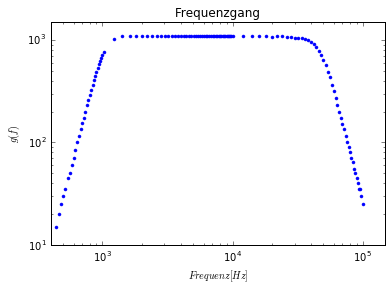

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#Daten einlesen
f, U_aus = np.loadtxt('frequenzgang.txt', skiprows=1, usecols=(0,1), unpack=True)
D=1e-3
U_ein=0.2
g=U_aus/(U_ein * D)

#g über f in ein doppellogarithmisches Diagramm eintragen:
plt.loglog(f[17:-29],g[17:-29], linestyle='None', marker='.')
plt.axis([4E2, 1.5e5, 10, 1.5E3])
plt.xlabel('$Frequenz [Hz]$')
plt.ylabel('$g(f)$')
plt.title('Frequenzgang')

### A2: Funktion anpassen

Das Integral begtraegt: 5.4579e+10


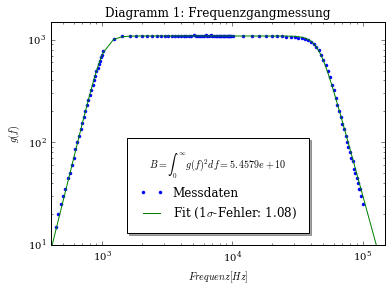

In [160]:
#Messwerte mit Fit plotten
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

#Messdaten laden
f, U_aus = np.loadtxt('frequenzgang.txt', skiprows=1, usecols=(0,1), unpack=True)
D=1e-3
U_ein=0.2
g=U_aus/(U_ein * D)


#Definieren der Fitfunktion
def fit_func(f, V, W1, W2, n1, n2):
    return V/(np.sqrt(1+1/(f/W1)**(2*n1))*np.sqrt(1+(f/W2)**(2*n2)))

#Startwerte p0 für die Fitparameter
p0 = [1000, 1000, 50000, 5, 5]
#Verstärkung V: 1000
#untere Grenzfrequenz W1: 1000
#obere Grenzfrequenz W2: 50000
#Filterordnung n1, n2: 5

#Durchführen des Fits
popt, pcov = curve_fit(fit_func, f[17:-29],g[17:-29], p0)

#Ermitteln des 1-sigma-Fehlers:
sigma = np.sqrt(pcov[0,0])

# Numerische Integration, aus nächster Aufgabe, für Plot vorgezogen
import scipy.integrate as integrate
def fit_func_square(f, V, W1, W2, n1, n2):
    return fit_func(f, V, W1, W2, n1, n2)**2
B=integrate.quad(fit_func_square, f[17], f[-29], args=tuple(popt))
print('Das Integral begtraegt: {value:.4e}'.format(value=B[0]))

#Plotten der Messdaten mit Fit
plt.loglog(f[17:-29],g[17:-29], linestyle='None', marker='.', label='Messdaten')
plt.loglog(f, fit_func(f, *popt), label='Fit (1$\sigma$-Fehler: %.2f)' %(sigma))
plt.axis([4E2, 1.5e5, 10, 1.5E3])
plt.rcParams["font.family"]='serif'
plt.rcParams["font.size"]='10'
plt.xlabel('$Frequenz [Hz]$')
plt.ylabel('$g(f)$')
plt.title('Diagramm 1: Frequenzgangmessung')
plt.legend(loc='best', title='$B=\int_{0}^{\infty}g(f)^2 df= %.4e$' %(B[0]), borderpad=1, borderaxespad=1, shadow='true')
#plt.savefig('Frequenzgang.pdf', format='pdf')
plt.savefig('Frequenzgangmessung.pdf', dpi=300, format='pdf')

### A3: Numerische Integration

In [30]:
import scipy.integrate as integrate

def fit_func_square(f, V, W1, W2, n1, n2):
    return fit_func(f, V, W1, W2, n1, n2)**2

B=integrate.quad(fit_func_square, f[17], f[-29], args=tuple(popt))
print('Das Integral begtraegt: {value:.4e}'.format(value=B[0]))

Das Integral begtraegt: 5.4579e+10


### A4: Bestimmung der Boltzmannkonstante

[  7.96494275e-04   1.76853154e+00]
2.35023770047
0.470047540094
Wahrscheinlichkeit = 80.0%


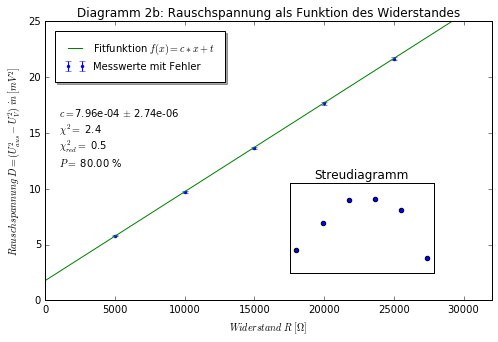

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

plt.rcParams["figure.figsize"][0] = 8
plt.rcParams["figure.figsize"][1] = 5

#Messwerte aus dem Protokoll
R=np.array([5e3, 10e3, 15e3, 20e3, 25e3, 30e3]) #Widerstände
U_aus=np.array([2.4093, 3.1198, 3.6971, 4.2011, 4.6534, 5.0728 ]) #Rauschspannung (Mittelwerte in mV)
fehler_U_aus=np.array([0.00825, 0.0111, 0.0133, 0.0166, 0.0162, 0.0187]) #Standardabweichung in mV
U_V=1.3803e-3 #Rauschspannung bei 0 Ohm

#Bereinigen der Messwerte und Aufstellen der Fehlerformel
D=(U_aus**2)-(U_V**2)
fehler_D=np.sqrt((2*U_aus*fehler_U_aus)**2+(2*U_V*7e-7)**2)

#Plot der bereinigten Messwerte
plt.errorbar(R, D, yerr=fehler_D, fmt='.', label='Messwerte mit Fehler')
plt.axis([0, 3.2e4, 0, 25])

#Fitten einer Gerade an die Daten: 
def linear(x, c, t): 
    return c*x + t
popt, pcov = curve_fit(linear, R, D)
x = np.linspace(0,30000, 100) #neue x-Achse definieren, weil R "0" nicht enthält
plt.plot(x, linear(x, *popt), linestyle='-', label='Fitfunktion $f(x)=c*x + t $') #Fit plotten
stdfehler = np.sqrt(pcov[0,0])
print popt

#Chi-quadrat-Summe berechnen
chisquare=np.sum(((linear(R, *popt)-D)**2/fehler_D**2))
dof=5 #degrees of freedom, Freiheitsgrade
chisquare_red=chisquare/dof
print(chisquare)
print(chisquare_red)

#Fitwahrscheinlichkeit berechnen: 
from scipy.stats import chi2
prob=round(1-chi2.cdf(chisquare, dof), 2)*100
print('Wahrscheinlichkeit = '+str(prob)+'%')

#Achsenbeschriftungen des Plots
plt.xlabel('$Widerstand\;R\;[\Omega]$')
plt.ylabel('$Rauschspannung\; D=(U_{aus}^{2}-U_{V}^{2})\;in\;[mV^2]$')
plt.title('Diagramm 2b: Rauschspannung als Funktion des Widerstandes')
plt.legend(loc='best', borderpad=1, borderaxespad=1, shadow='true', fontsize='medium')

#Plotten der berechneten Werte unter die Legende
plt.rcParams["figure.figsize"][0] = 8
plt.rcParams["figure.figsize"][1] = 5
plt.text(1000, 16.5, '$c=$%.2e $\pm$ %.2e' %(popt[0], stdfehler ), fontsize=10)
plt.text(1000, 15, '$\chi^{2}=$ %.1f' %(chisquare), fontsize=10)
plt.text(1000, 13.5, '$\chi_{red}^{2}=$ %.1f ' %(chisquare_red), fontsize=10)
plt.text(1000, 12, '$P=$ %.2f ' %(prob) + '%', fontsize=10)

#Subplot mit Streudiagramm
plt.axes([.55, .2, .25, .25])
plt.xticks(())
plt.yticks(())
plt.title('Streudiagramm')
plt.scatter(R, (linear(R, *popt)-D))
plt.grid(True)

#Plot abspeichern
plt.savefig('Rauschspannung.pdf', dpi=300, format='pdf')

Zusätliches Streudiagramm zum Verbessern des Fits

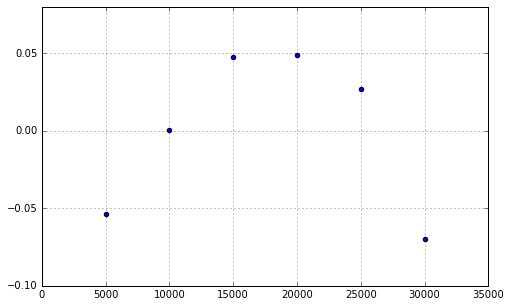

In [28]:
plt.scatter(R, (linear(R, *popt)-D))
plt.grid(True)
#plt.ylim((-1e07, 1e-07))
plt.savefig('Streuung.pdf', dpi=300, format='pdf')